<a href="https://colab.research.google.com/github/OnzyBoy/CDAV_Capstone-Project/blob/main/personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introvert Extrovert Analysis

* Data Source: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data


* Features:
    - Time_spent_Alone: Hours spent alone daily (0-11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0-10).
    - Going_outside: Frequency of going outside (0-7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0-15).
    - Post_frequency: Social media post frequency (0-10).
    - Personality: Target variable (Extrovert/Introvert).*

In [ ]:
# Categorical Features - Stage_fear, Drained_after_socializing, Personality
# Numerical Features - Time_spent_Alone, Social_event_attendance, Going_Outside, Friend_circle_size, Post_frequency

##Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from scipy.stats import chi2_contingency
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression

import ipywidgets as widgets
from ipywidgets import interact, interactive

import warnings
warnings.filterwarnings('ignore')

## Knowing your data

In [ ]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
#Random 7 observations
df.sample(7)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2587,8.0,Yes,1.0,1.0,Yes,1.0,0.0,Introvert
2745,10.0,Yes,1.0,1.0,Yes,2.0,2.0,Introvert
2395,7.0,Yes,0.0,0.0,NaN,3.0,1.0,Introvert
302,3.0,No,4.0,4.0,No,7.0,5.0,Extrovert
2814,0.0,No,9.0,6.0,No,14.0,7.0,Extrovert
1781,2.0,No,5.0,6.0,No,7.0,6.0,Extrovert
2055,9.0,Yes,1.0,1.0,Yes,4.0,1.0,Introvert


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
#Categorizing numerical and categorical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

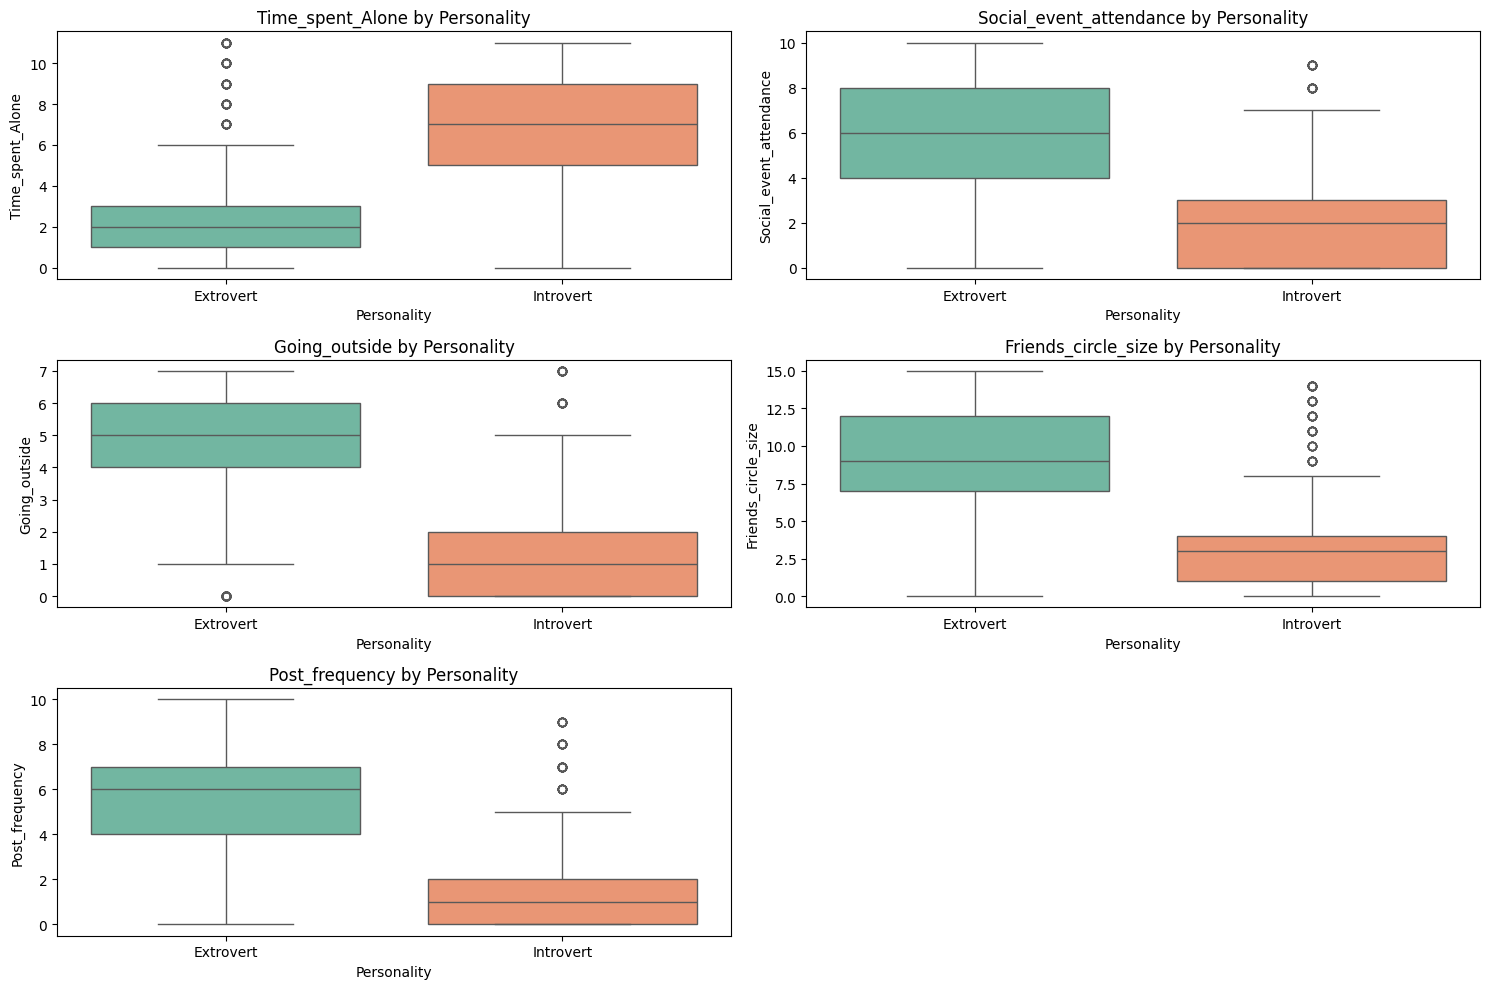

In [ ]:
#Identify Outliers w/ boxplots
# Boxplots of numeric features by Personality
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.boxplot(x='Personality', y=col, data=df, palette="Set2")
    plt.title(f'{col} by Personality')

plt.tight_layout()
plt.show()

## Data Formating and Cleaning

In [ ]:
#Drop empty rows
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


In [ ]:
#To remove decimal places
to_int = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[to_int] = df[to_int].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           2477 non-null   int64 
 1   Stage_fear                 2477 non-null   object
 2   Social_event_attendance    2477 non-null   int64 
 3   Going_outside              2477 non-null   int64 
 4   Drained_after_socializing  2477 non-null   object
 5   Friends_circle_size        2477 non-null   int64 
 6   Post_frequency             2477 non-null   int64 
 7   Personality                2477 non-null   object
dtypes: int64(5), object(3)
memory usage: 174.2+ KB


## Exploratory Data Analysis

### Univariate Analysis

#### Categorical Features

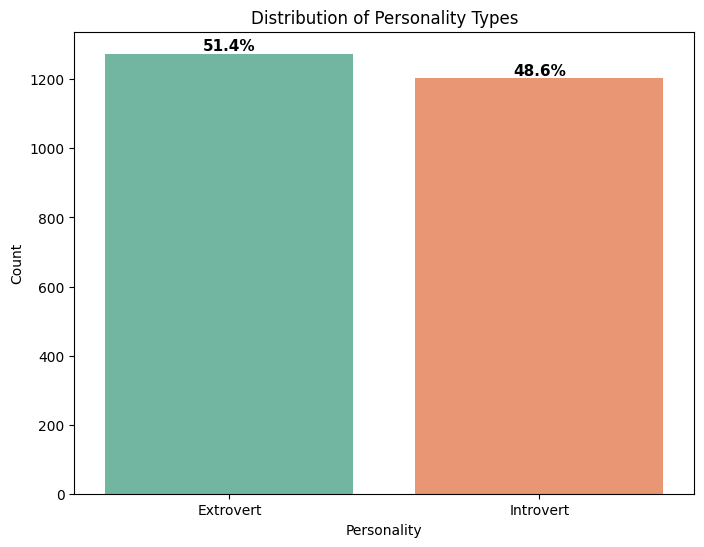

Personality
Extrovert    1274
Introvert    1203
Name: count, dtype: int64


In [ ]:
# Class distribution of personality types with percentages
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Personality', data=df, palette="Set2")

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.title('Distribution of Personality Types')
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

# Display raw counts
print(df['Personality'].value_counts())

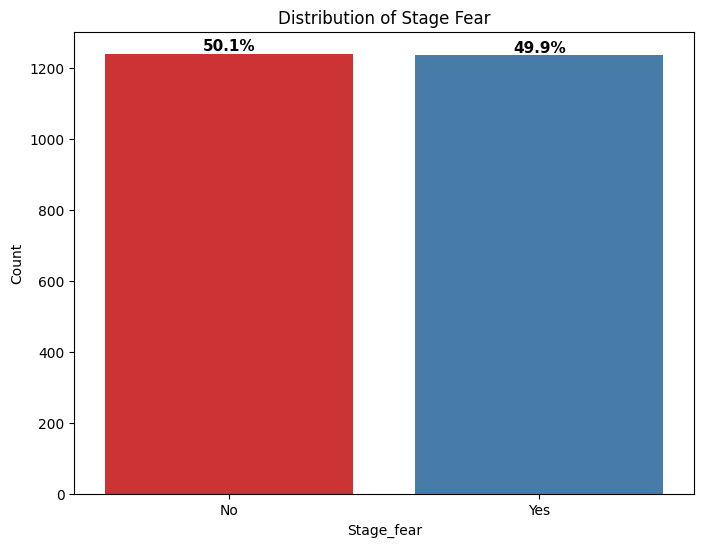

Stage_fear
No     1241
Yes    1236
Name: count, dtype: int64


In [ ]:
# Class distribution of Stage fear with percentages
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Stage_fear', data=df, palette="Set1")

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.title('Distribution of Stage Fear')
plt.ylabel("Count")
plt.show()

# Raw counts
print(df['Stage_fear'].value_counts())

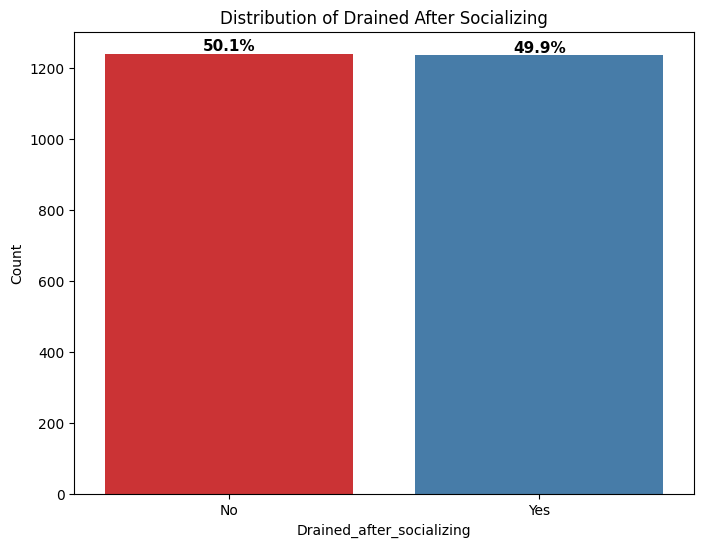

Drained_after_socializing
No     1241
Yes    1236
Name: count, dtype: int64


In [ ]:
# Class distribution of Drained after Socializing with percentages
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Drained_after_socializing', data=df, palette="Set1")

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.title('Distribution of Drained After Socializing')
plt.ylabel("Count")
plt.show()

# Raw counts
print(df['Drained_after_socializing'].value_counts())

#### Numerical Features

In [ ]:
num_features = df.select_dtypes(include=['int64']).columns
cat_features = df.select_dtypes(include=['object']).columns

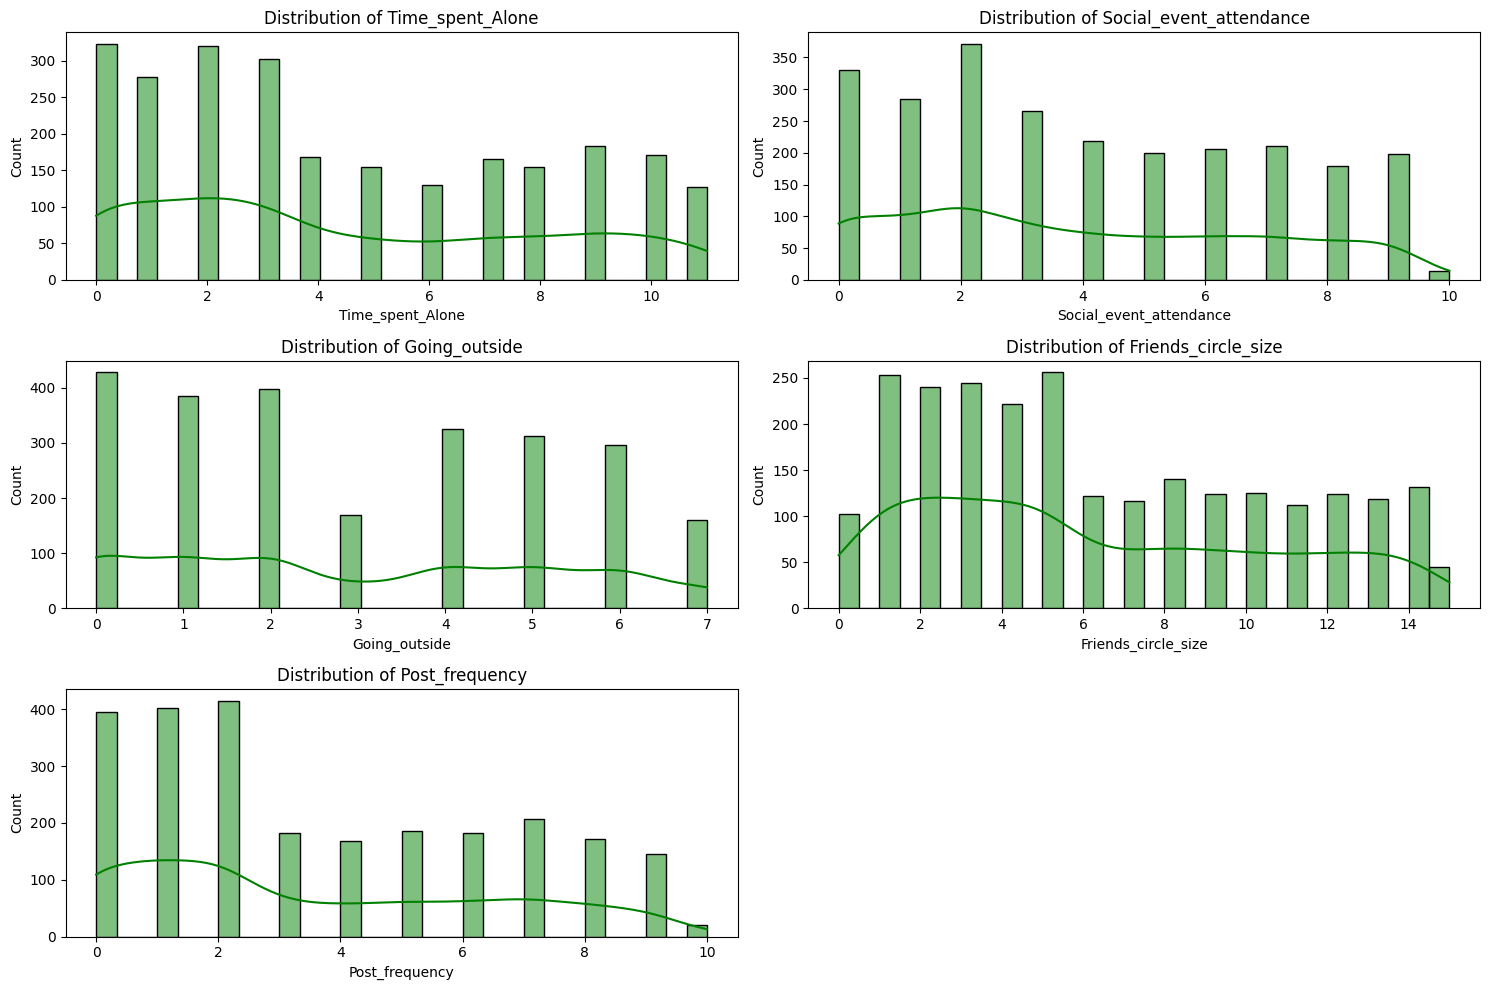

In [ ]:
# Histograms + Kernel Density Estimator (KDE) for numerical features (True shape for distribution)
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="green")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

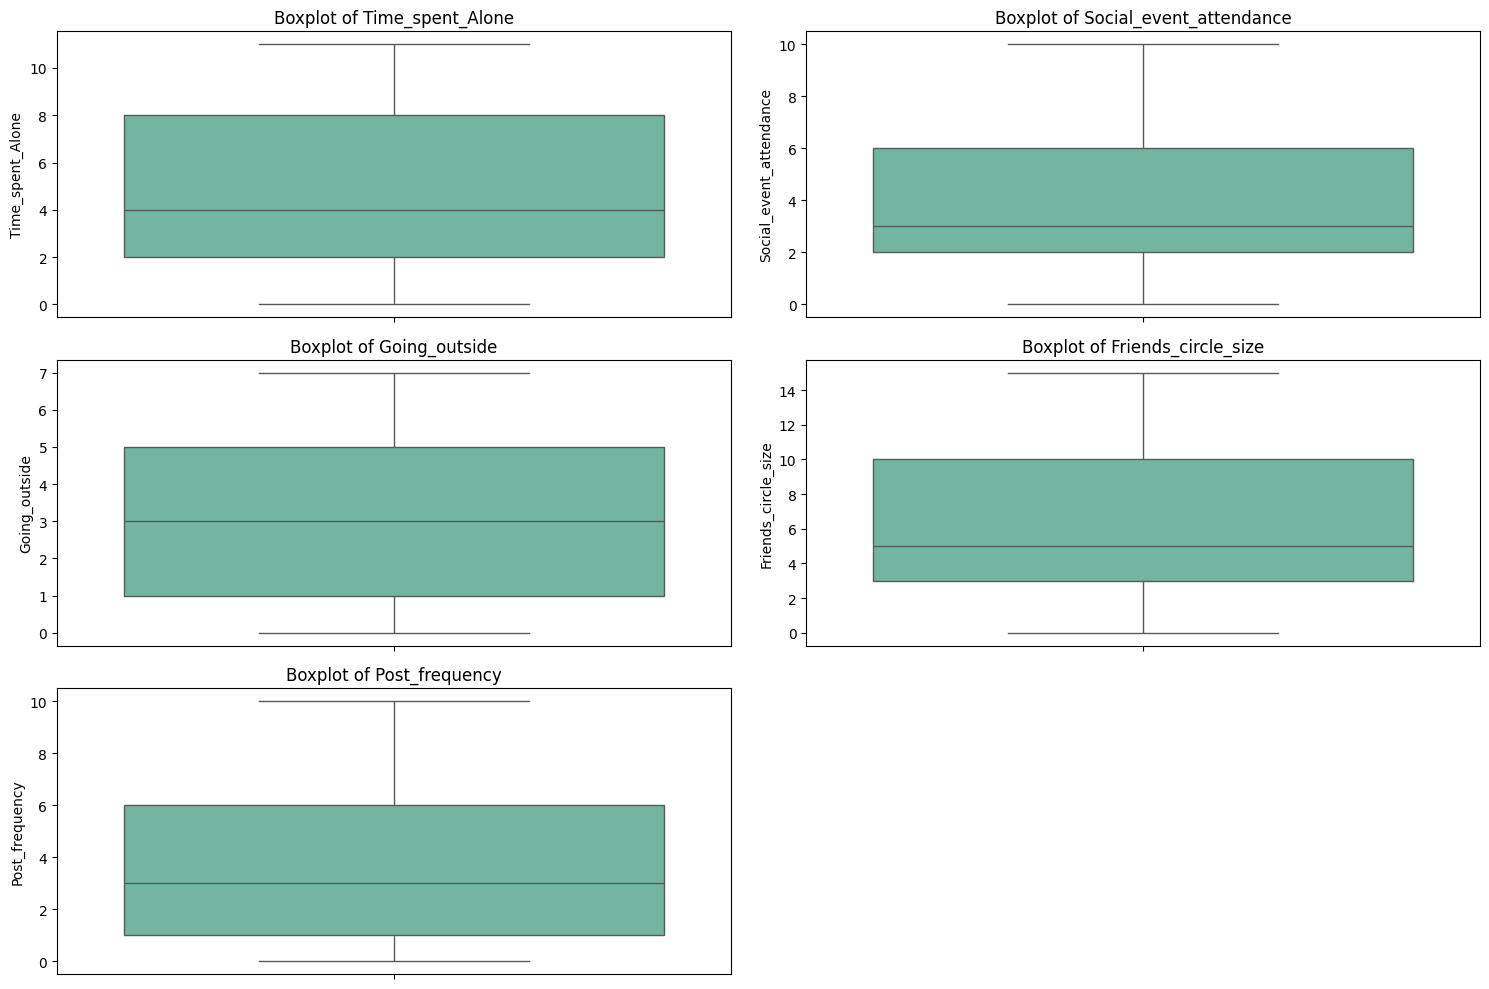

In [ ]:
# Boxplots of numerical features
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
#Summary of Numeric Features
df[num_features].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,3.939039,3.013726,6.239806,3.559548
std,3.491162,2.900044,2.257239,4.311365,2.927397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


### Bivariate Analysis

#### Categorical Vs. Categorical

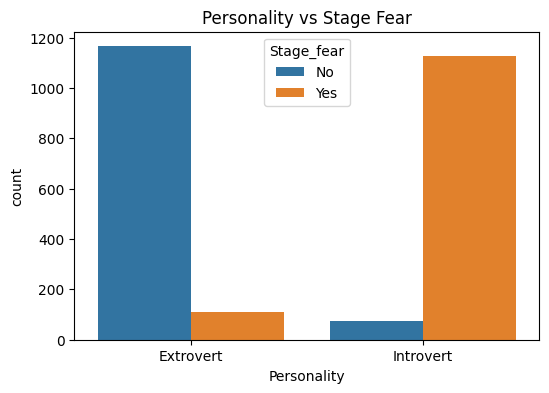

Personality  Stage_fear
Extrovert    No            91.44
             Yes            8.56
Introvert    Yes           93.68
             No             6.32
Name: proportion, dtype: float64 

Personality  Stage_fear
Extrovert    No            1165
             Yes            109
Introvert    Yes           1127
             No              76
Name: count, dtype: int64


In [ ]:
#Stage Fear and Personality
# Cross-tab
pd.crosstab(df['Personality'], df['Stage_fear'], normalize='index') * 100

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='Personality', hue='Stage_fear', data=df)
plt.title("Personality vs Stage Fear")
plt.show()

#Percentages
print(round(df.groupby("Personality")["Stage_fear"].value_counts(normalize=True) * 100,2), "\n")
#Raw Counts
print(df.groupby("Personality")["Stage_fear"].value_counts())

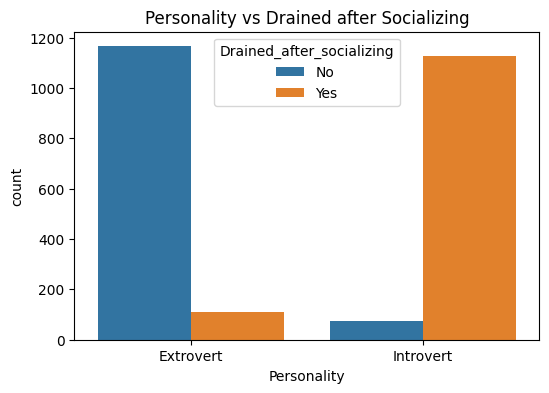

Personality  Drained_after_socializing
Extrovert    No                           91.44
             Yes                           8.56
Introvert    Yes                          93.68
             No                            6.32
Name: proportion, dtype: float64 

Personality  Drained_after_socializing
Extrovert    No                           1165
             Yes                           109
Introvert    Yes                          1127
             No                             76
Name: count, dtype: int64


In [ ]:
#Drained after Socializing and Personality
# Cross-tab
pd.crosstab(df['Personality'], df['Drained_after_socializing'], normalize='index') * 100

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='Personality', hue='Drained_after_socializing', data=df)
plt.title("Personality vs Drained after Socializing")
plt.show()

#Percentages
print(round(df.groupby("Personality")["Drained_after_socializing"].value_counts(normalize=True) * 100,2), "\n")
#Raw Counts
print(df.groupby("Personality")["Drained_after_socializing"].value_counts())

#### Categorical Vs. Numerical

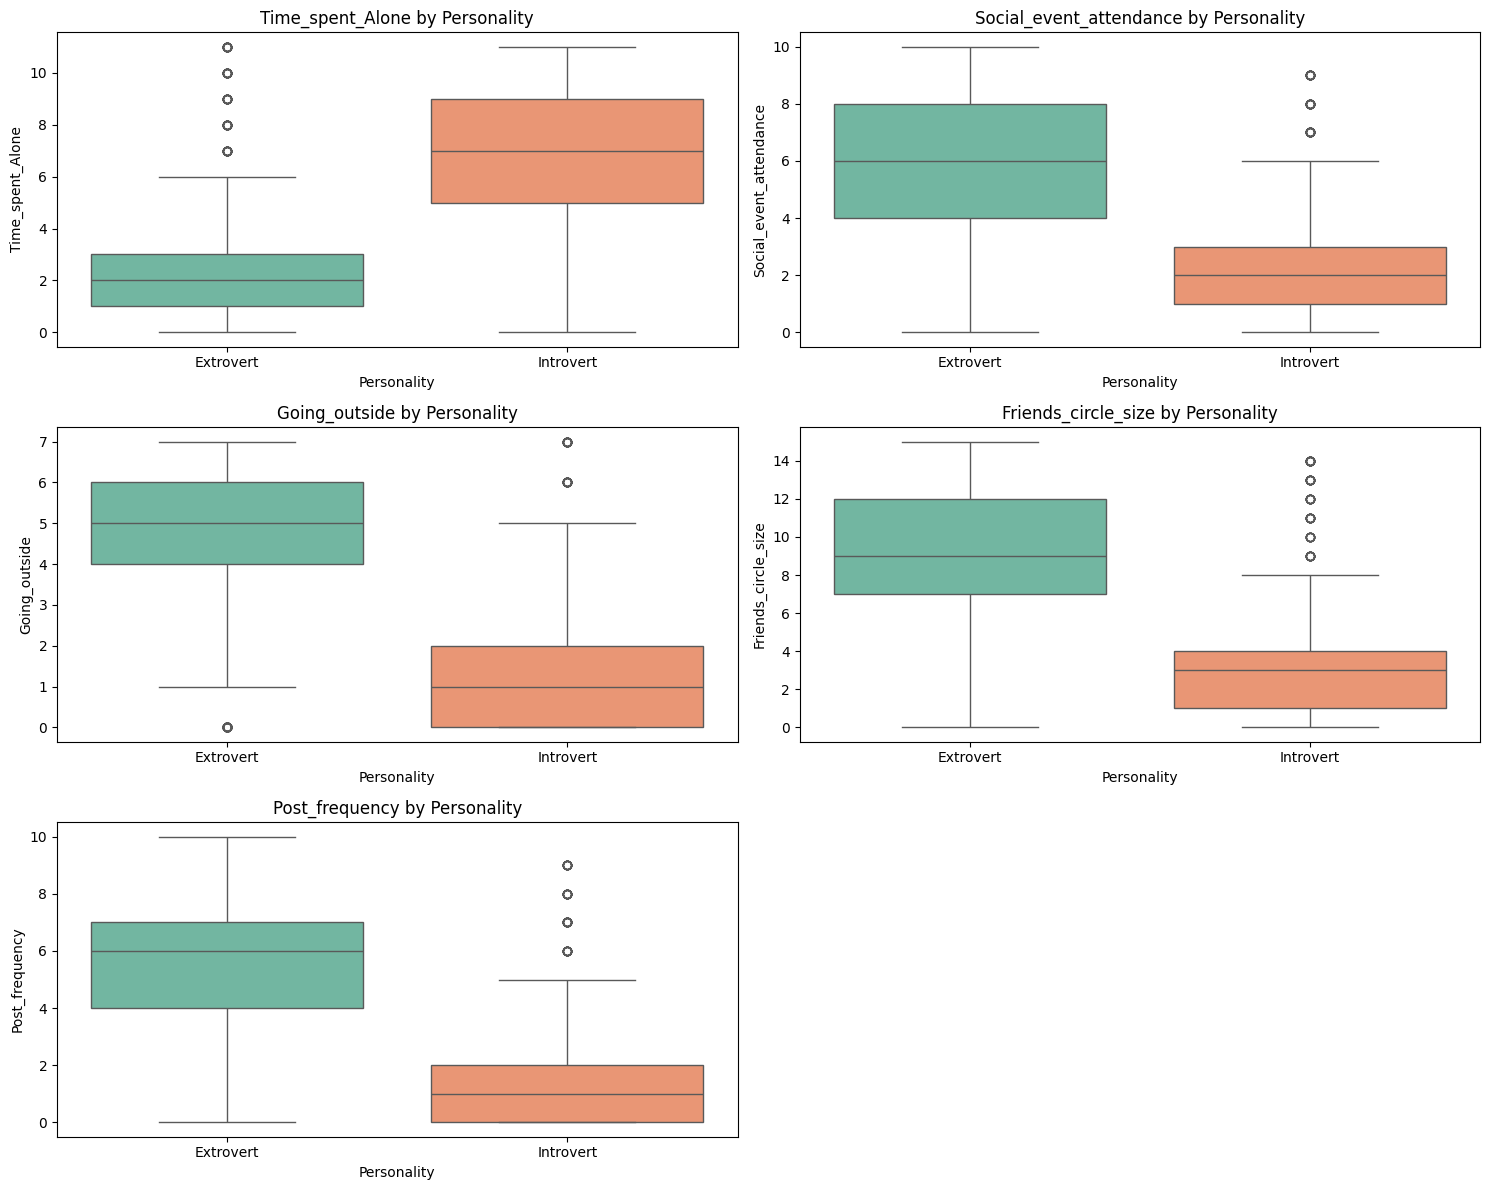

In [ ]:
# Boxplot of numerical features by Personality
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.boxplot(x="Personality", y=col, data=df, palette="Set2")
    plt.title(f'{col} by Personality')

plt.tight_layout()
plt.show()

In [ ]:
# Detect outliers for numerical features against personality type
# Function to detect outliers using IQR
def detect_outliers(group, feature):
    Q1 = group[feature].quantile(0.25)
    Q3 = group[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((group[feature] < lower_bound) | (group[feature] > upper_bound)).sum()

# Check outliers for all numerical features by Personality
outlier_summary = {}

for col in num_features:
    outlier_counts = df.groupby("Personality").apply(lambda g: detect_outliers(g, col))
    outlier_summary[col] = outlier_counts

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.columns = ['Extrovert_outliers', 'Introvert_outliers']
outlier_df

,Extrovert_outliers,Introvert_outliers
Time_spent_Alone,92,0
Social_event_attendance,0,51
Going_outside,44,39
Friends_circle_size,0,64
Post_frequency,0,54


**Time_spent_Alone** - Outliers only among Extroverts (92).
* Some extroverts may report unusually high alone-time, which is atypical for their group. Possibility of being an Ambivert
* Ambivert: A person who exhibits both introverted and extroverted traits, enjoying social engagement but also requiring alone time

**Social_event_attendance** - Outliers only among Introverts (51).
* Suggests some introverts attend way more events than the “normal” introvert range.
* Could be a social introvert who are not against social interaction but prefer smaller groups or one-on-one settings over large gatherings, which can be draining for them


**Going_outside** - Both groups have outliers (Extroverts 44, Introverts 39).
* Extreme variation in outdoor activity exists in both.

**Friends_circle_size** - Outliers only among Introverts (64).
* Likely introverts with unusually large friend circles.

**Post_frequency**- Outliers only among Introverts (54).
* Suggests some introverts are very active online (more than typical).

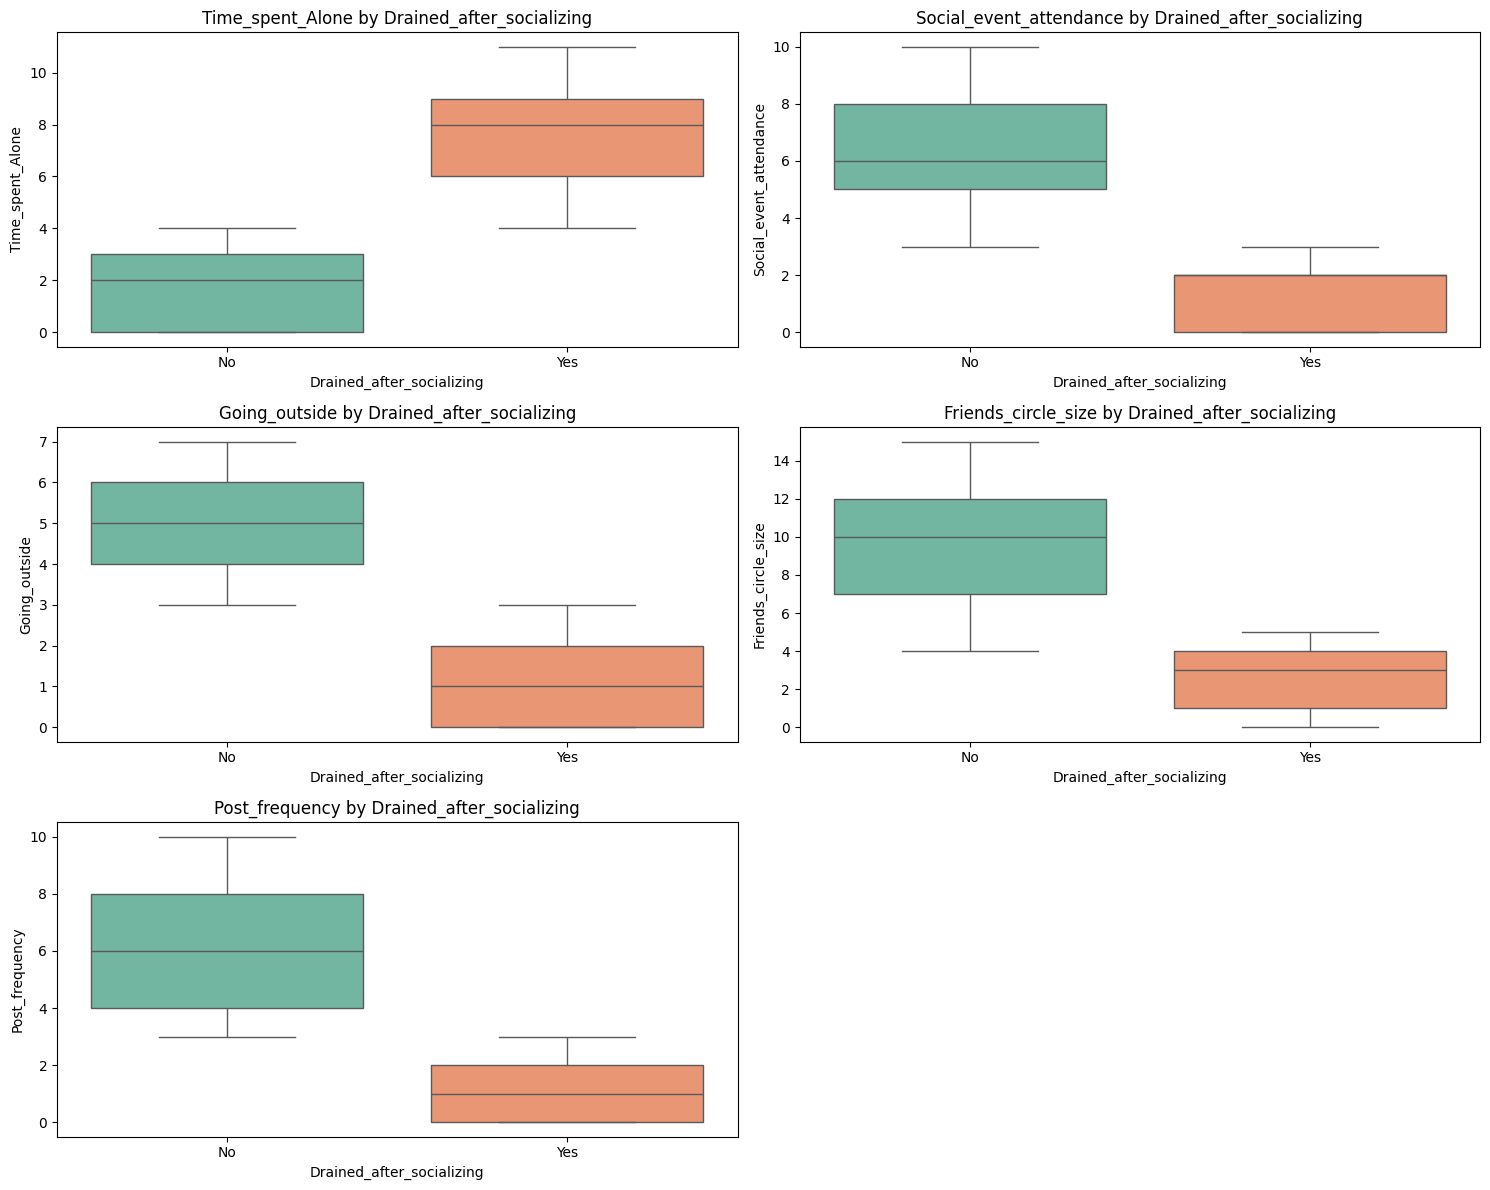

In [ ]:
# Boxplots of numerical features by Drained after Socializing
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.boxplot(x="Drained_after_socializing", y=col, data=df, palette="Set2")
    plt.title(f'{col} by Drained_after_socializing')

plt.tight_layout()
plt.show()

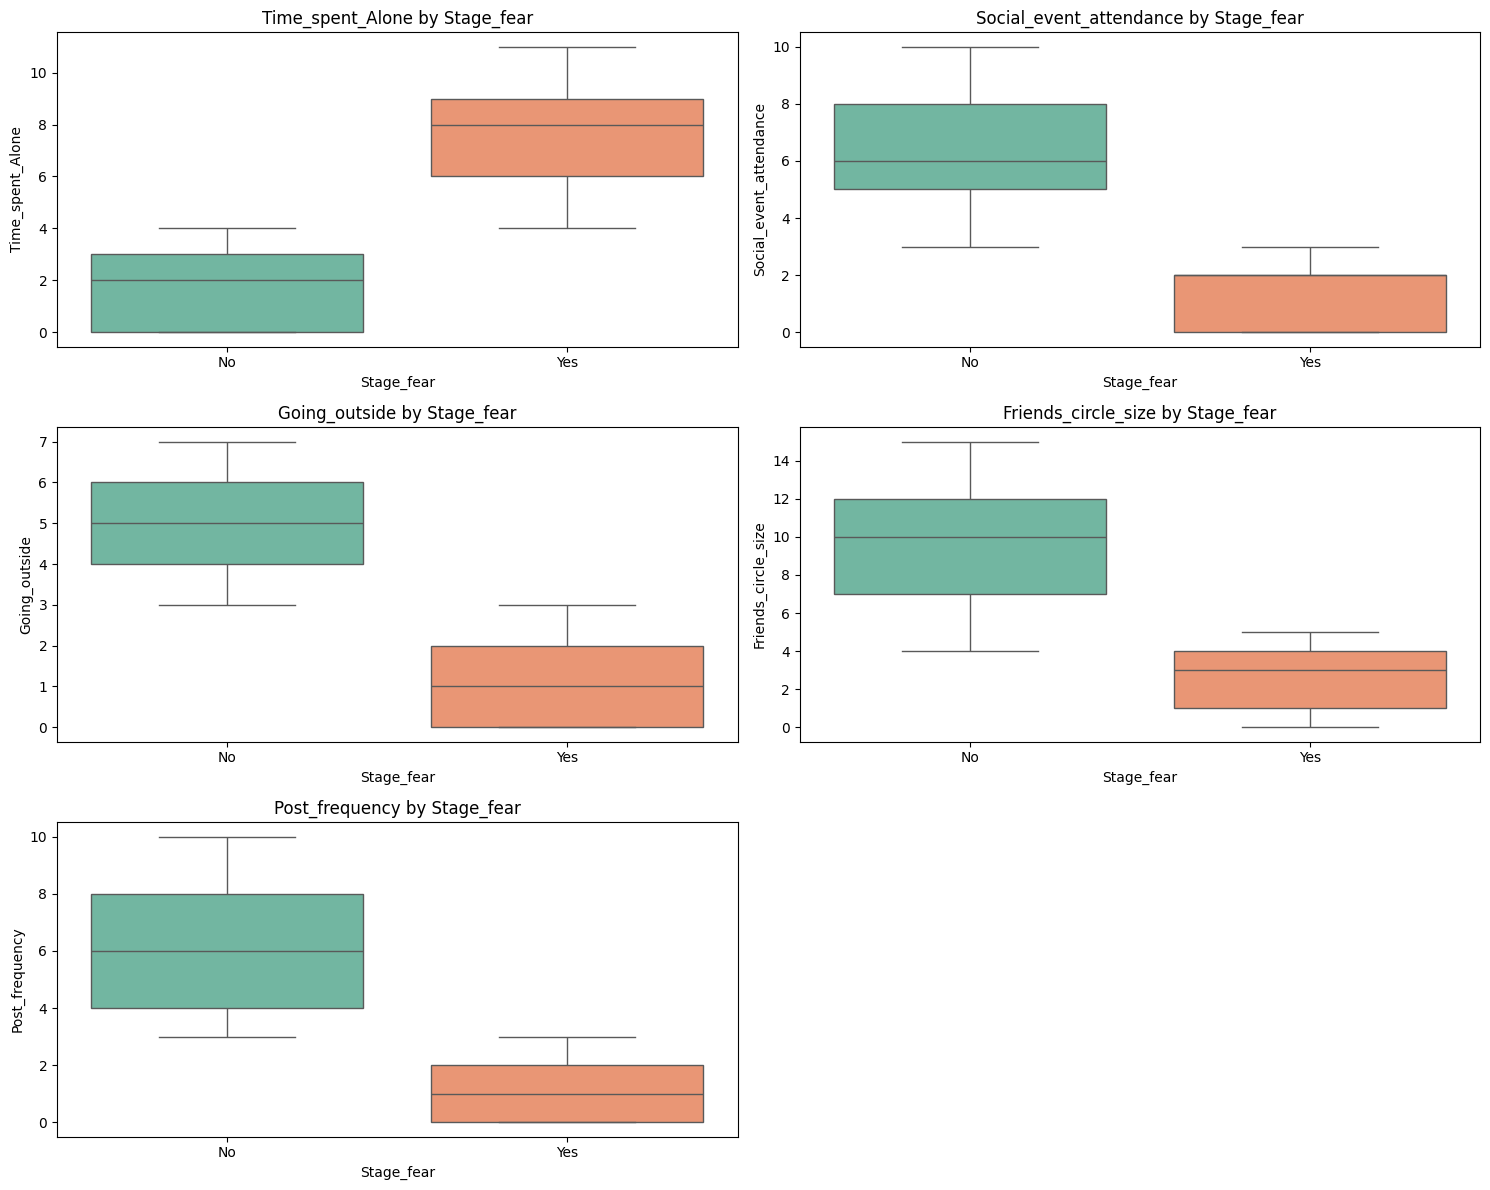

In [ ]:
# Boxplots of numerical features by Stage fear
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)
    sns.boxplot(x="Stage_fear", y=col, data=df, palette="Set2")
    plt.title(f'{col} by Stage_fear')

plt.tight_layout()
plt.show()

#### Numerical Vs. Numerical

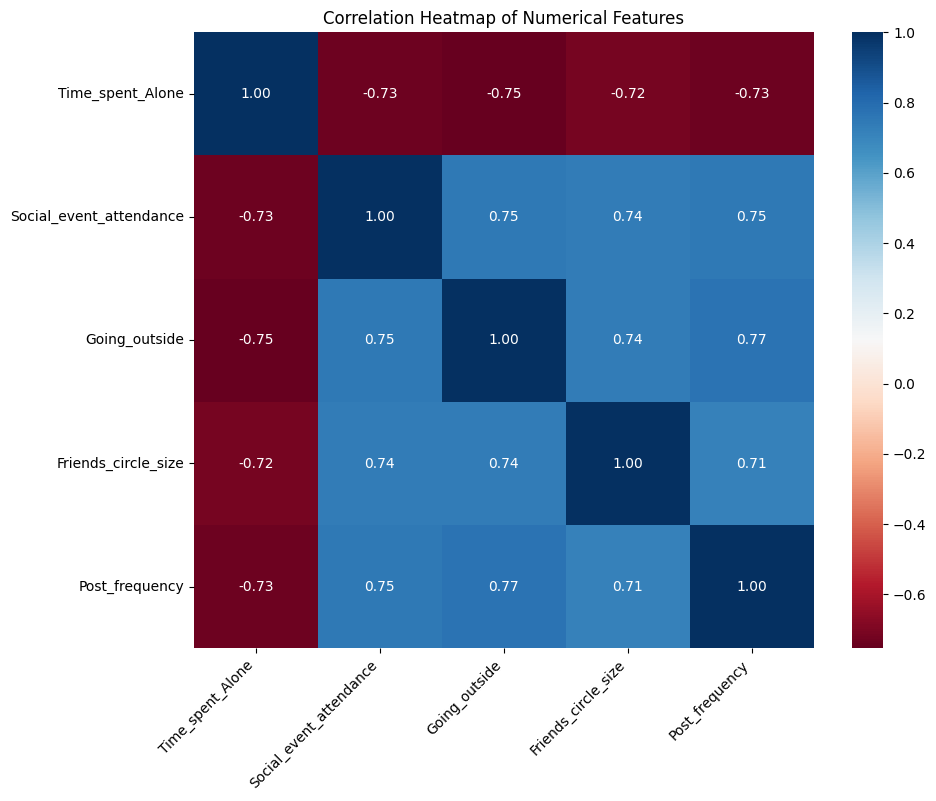

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

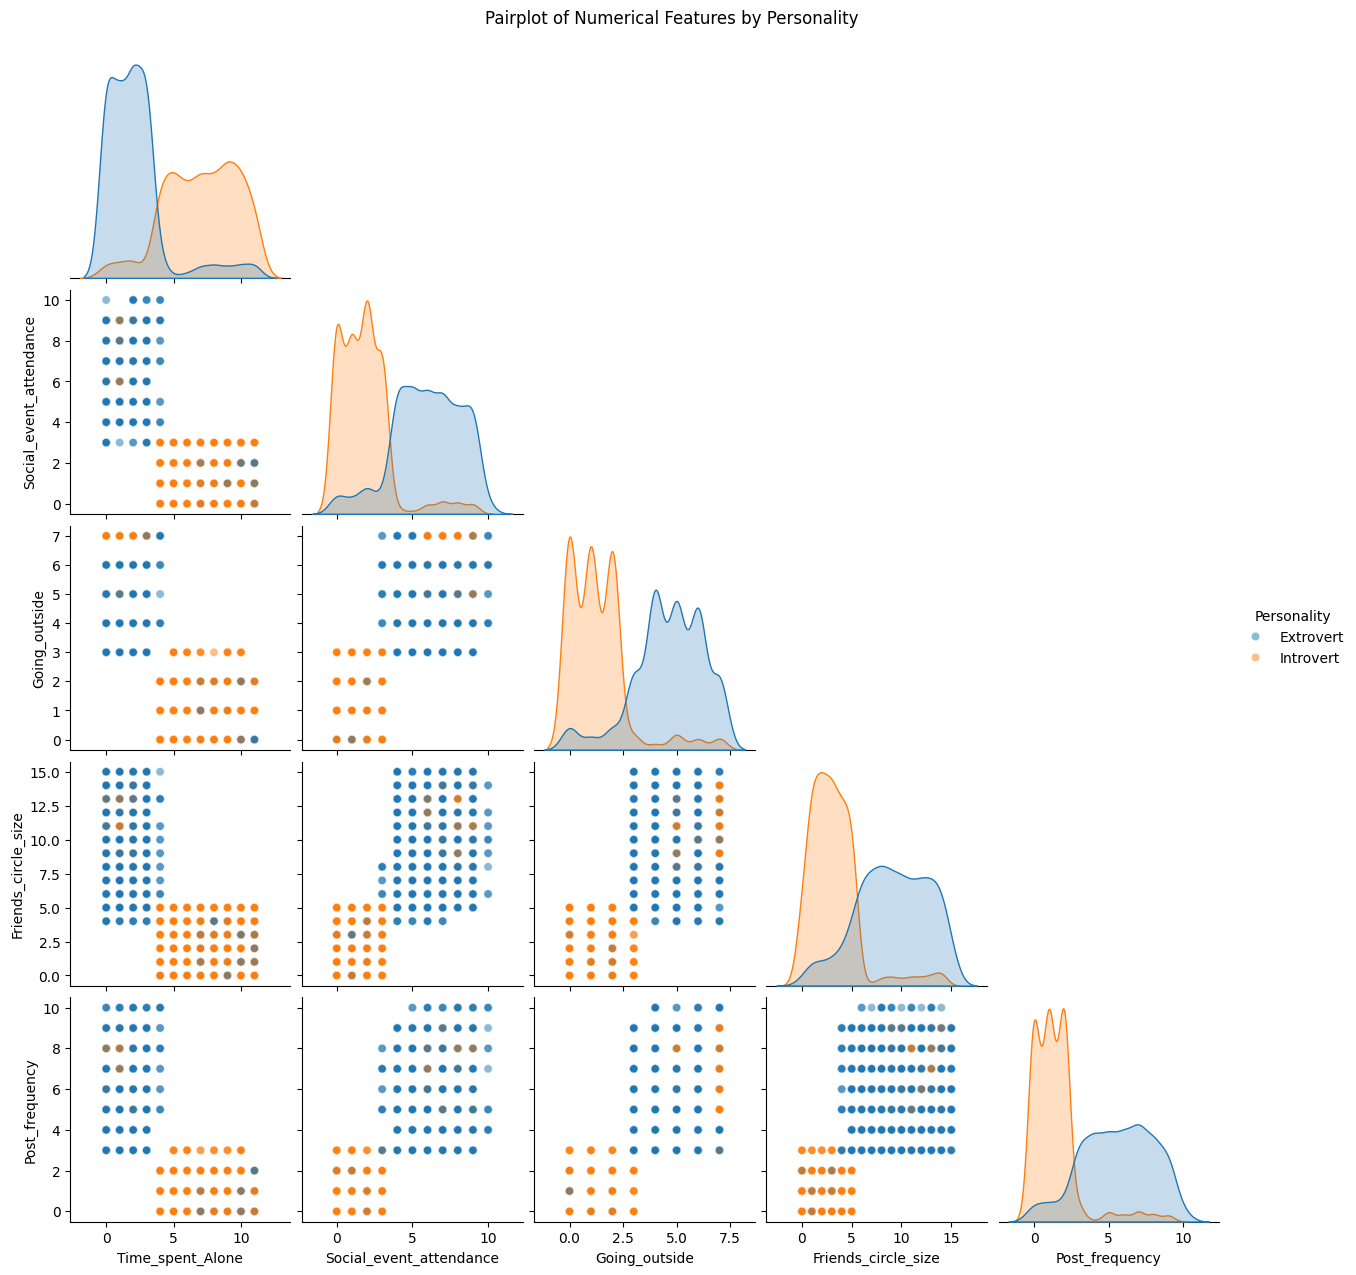

In [ ]:
# Pairplot of numerical features with Personality as hue
pairplot = sns.pairplot(
    df[num_features.tolist() + ["Personality"]],
    hue="Personality",
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha":0.5}
)

# Add title
pairplot.fig.suptitle("Pairplot of Numerical Features by Personality", y=1.02)

# Save as PNG
pairplot.savefig("pairplot_personality.png", dpi=300, bbox_inches='tight')

plt.show()


## Descriptive Statistics

In [ ]:
round(df.describe(),2)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.00,2477.00,2477.00,2477.00,2477.00
mean,4.52,3.94,3.01,6.24,3.56
std,3.49,2.90,2.26,4.31,2.93
min,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,1.00,3.00,1.00
50%,4.00,3.00,3.00,5.00,3.00
75%,8.00,6.00,5.00,10.00,6.00
max,11.00,10.00,7.00,15.00,10.00


In [ ]:
df['Personality'].value_counts()

,count
Personality,
Extrovert,1274
Introvert,1203


## Inferential Statistics

### Hypothesis Testing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           2477 non-null   int64 
 1   Stage_fear                 2477 non-null   object
 2   Social_event_attendance    2477 non-null   int64 
 3   Going_outside              2477 non-null   int64 
 4   Drained_after_socializing  2477 non-null   object
 5   Friends_circle_size        2477 non-null   int64 
 6   Post_frequency             2477 non-null   int64 
 7   Personality                2477 non-null   object
dtypes: int64(5), object(3)
memory usage: 174.2+ KB


In [ ]:
#encode categorical values
encode = {
    'Personality': {'Introvert': 0, 'Extrovert': 1},
    'Stage_fear': {'Yes': 1, 'No': 0},
    'Drained_after_socializing': {'Yes': 1, 'No': 0}
}

df.replace(encode, inplace = True)

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,0,4,6,0,13,5,1
1,9,1,0,0,1,0,3,0
2,9,1,1,2,1,5,2,0
3,0,0,6,7,0,14,8,1
4,3,0,9,4,0,8,5,1


###Chi-Square Test

Question 1: Is there an association between stage fear and personality type?


*   Null Hypothesis (H₀) - Personality type is not associated with stage fear
*   Alternative Hypothesis (H₁) - Personality type is associated with stage fear



In [ ]:
# Contigency Table
contingency_table = pd.crosstab(df['Personality'], df['Stage_fear'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test Results for {'Personality'} vs. {'Stage Fear'}:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Test Results for Personality vs. Stage Fear:
Chi-Square Statistic: 1790.102050874301
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[602.71417037 600.28582963]
 [638.28582963 635.71417037]]


Interpretation:
*   We reject the null hypothesis, H₀ (p < 0.001).
*   Personality type is strongly associated with stage fear.

Question 2: Is there an association between feeling drained after socializing and personality type?


*   Null Hypothesis (H₀) - Personality type is not associated with feeling drained after socializing
*   Alternative Hypothesis (H₁) - Personality type is associated with feeling drained after socializing



In [ ]:
# Contigency Table
contingency_table = pd.crosstab(df['Personality'], df['Drained_after_socializing'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test Results for {'Personality'} vs. {'Drained After Socializing'}:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Test Results for Personality vs. Drained After Socializing:
Chi-Square Statistic: 1790.102050874301
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[602.71417037 600.28582963]
 [638.28582963 635.71417037]]


Interpretation
*   Reject the null hypothesis, H₀ (p < 0.001).
*   Personality type is strongly associated with feeling drained after socializing.

Question 3: Is there an association between having stage fear and feeling drained after socializing?


*   Null Hypothesis (H₀) - Stage fear is not associated with feeling drained after socializing
*   Alternative Hypothesis (H₁) - Stage fear is associated with feeling drained after socializing



In [ ]:
# Contigency Table
contingency_table = pd.crosstab(df['Stage_fear'], df['Drained_after_socializing'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test Results for {'Stage_fear'} vs. {'Drained After Socializing'}:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Test Results for Stage_fear vs. Drained After Socializing:
Chi-Square Statistic: 2473.0015985712616
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[621.75252321 619.24747679]
 [619.24747679 616.75252321]]


Interpretation
*   Reject the null hypothesis, H₀ (p < 0.001).
*   Stage fear is strongly associated with feeling drained after socializing.

### Independent T-Test

In [ ]:
# Add an average score for the numeric features
df['Average_Score'] = df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].mean(axis=1)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Average_Score
0,4,0,4,6,0,13,5,1,6.4
1,9,1,0,0,1,0,3,0,2.4
2,9,1,1,2,1,5,2,0,3.8
3,0,0,6,7,0,14,8,1,7.0
4,3,0,9,4,0,8,5,1,5.8


Question 4: Is there a significant difference in average scores between extroverts and introverts?

*   Null Hypothesis (H₀) - There is no significant difference in average scores between extroverts and introverts.
*   Alternative Hypothesis (H₁) - There is a significant difference in average scores between extroverts and introverts

In [ ]:
# Separate groups
introverts = df[df['Personality'] == 0]['Average_Score']
extroverts = df[df['Personality'] == 1]['Average_Score']

# Welch’s t-test
t_test_result = stats.ttest_ind(introverts, extroverts, equal_var=False)

print("T-test Result:", t_test_result)

T-test Result: TtestResult(statistic=np.float64(-54.49484345549291), pvalue=np.float64(0.0), df=np.float64(2472.0270653296275))


Interpretation
*   Reject the null hypothesis, H₀ (p < 0.001).
*   There is a significant difference in average scores between introverts and extroverts.

In [ ]:
# 0 - Introverts | 1 - Extroverts
round(df.groupby("Personality")["Average_Score"].mean(),2)

,Average_Score
Personality,
0,2.96
1,5.48


## Correlation Analysis

### Pearson Correlation

Question - Is there a correlation between time spent alone, social event attendance, going outside, friend circle size and post frequency?

*   Null Hypothesis (H₀) - There is no correlation between social engagements
*   Alternative Hypothesis (H₁) - There is a strong correlation between social engagements

In [ ]:
# Compute Pearson correlation coefficients Time Spent Alone,Social event attendance, Going Outside, FRiend Circle Size and Post Frequency
correlation_matrix = df[["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]].corr(method="pearson")

# Display correlation matrix using IPython.display
display(correlation_matrix)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.733520,-0.753479,-0.717649,-0.734291
Social_event_attendance,-0.733520,1.000000,0.752775,0.738690,0.748494
Going_outside,-0.753479,0.752775,1.000000,0.738999,0.772445
Friends_circle_size,-0.717649,0.738690,0.738999,1.000000,0.713145
Post_frequency,-0.734291,0.748494,0.772445,0.713145,1.000000


Pearson correlation analysis revealed that:
* Time Spent Alone was strongly negatively correlated with:
 - Social Event Attendance (r = -0.73)
 - Going Outside (r = -0.75)
 - Friends Circle Size (r = -0.72)
 - Post Frequency (r = -0.73).

* Strong positive correlations were observed among:
 - Social Event Attendance,
 - Going Outside,
 - Friends Circle Size
 - Post Frequency
 - all r > 0.70

This indicates that individuals who spend more time alone tend to have fewer social connections and lower online activity otherwise they have more social connections and higher online activity

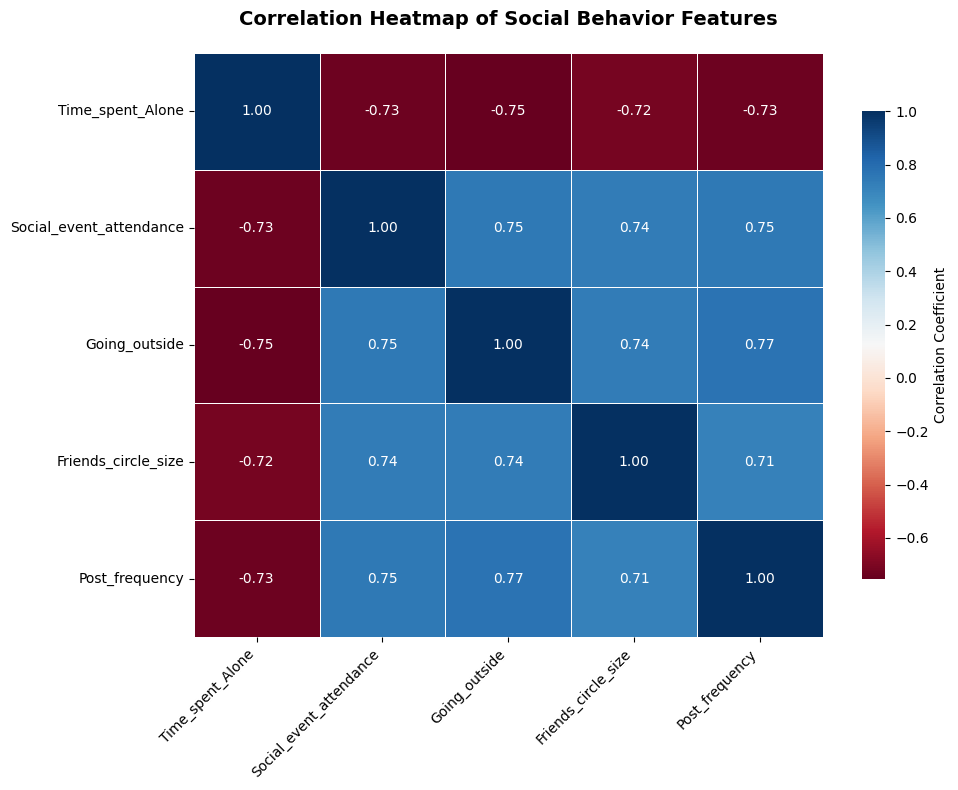

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # show correlation values
    cmap="RdBu",
    fmt=".2f",               # fewer decimals for readability
    linewidths=0.7,
    linecolor="white",       # cleaner gridlines
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # smaller, labeled colorbar
)

plt.title("Correlation Heatmap of Social Behavior Features", fontsize=14, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

## Regression Analysis

### Multiple Regression Analysis

In [ ]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality', 'Average_Score'],
      dtype='object')

In [ ]:
# Categorical Features - Stage_fear, Drained_after_socializing, Personality
# Numerical Features - Time_spent_Alone, Social_event_attendance, Going_Outside, Friend_circle_size, Post_frequency

In [ ]:
y = df["Average_Score"]
# Multiple Linear Regression
print("\nMultiple Linear Regression Results: Predicting Average Score")
# Option 1: Drop Stage_fear
X1 = df[["Drained_after_socializing", "Personality"]]
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
print("\n Model One summary")
print(model1.summary())

# Option 2: Drop Drained_after_socializing
X2 = df[["Stage_fear", "Personality"]]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print("\n Model Two summary")
print(model2.summary())



Multiple Linear Regression Results: Predicting Average Score

 Model One summary
                            OLS Regression Results                            
Dep. Variable:          Average_Score   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     4669.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:38:07   Log-Likelihood:                -2907.6
No. Observations:                2477   AIC:                             5821.
Df Residuals:                    2474   BIC:                             5839.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Model 1 Intepretation:

Model Fit Check:
*   R-squared(0.791). This means 79.1% of the variation in Average_Score is explained by the two predictors (Drained_after_socializing and Personality)

*   Adj. R-squared(0.790). Since Adjusted R² is almost the same as R², it shows that both predictors are contributing meaningfully, and the model isn't overfitting with unnecessary variables and it's relatively stable.

F-test check if the model is significant
*   F-statistic(4669) and (Prob[0.0] < 0.001). The large F-value (4669) and p < 0.001 mean the model is highly statistically significant overall.

Coefficients and Significants
*   const (5.98). This is the predicted Average_Score when all predictors = 0. This means an Introvert (0), who is Not Drained after socializing (0), has an expected Average Score of 5.98.

*   Drained_after_socializing(-3.23). Being drained after socializing reduces the Average Score by 3.23 points, compared to someone who is not drained, holding Personality constant.

*   Personality(-0.23). Extroverts score about 0.23 lower than introverts, on average, holding Drained_after_socializing constant.






Model 2 Intepretation:

Model Fit Check:
*   R-squared(0.791). About 79.1% of the variance in Average_Score is explained by the predictors (Stage_fear, Personality)

*   Adj. R-squared(0.790). Since Adjusted R² is almost the same as R², it shows that both predictors are contributing meaningfully, and the model isn't overfitting with unnecessary variables and it's relatively stable.

F-test check if the model is significant
*   F-statistic(4669) and (Prob[0.0] < 0.001). The large F-value (4669) and p < 0.001 mean the model is highly statistically significant overall.

Coefficients and Significants
*   const (5.98). This is the baseline case: an Introvert with No Stage Fear. Their expected Average_Score is 5.98

*   Stage_fear (-3.23). Students who experience stage fear score 3.23 points lower than those without stage fear, holding personality constant.

*   Personality(-0.23). Extroverts score 0.23 points lower than introverts, holding stage fear constant.






## Logistic Regression

To confirm the probability which predictor determines if you are an introvert or extrovert

In [ ]:
# Dependent variable
y = df["Personality"]

# Independent variables (raw features, except Average_Score)
X = df[[
    "Drained_after_socializing",
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
]]

# Add constant (intercept)
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print results
print(logit_model.summary())

# Odds ratios (easier interpretation)
odds_ratios = np.exp(logit_model.params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.246196
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Personality   No. Observations:                 2477
Model:                          Logit   Df Residuals:                     2470
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                  0.6446
Time:                        09:38:07   Log-Likelihood:                -609.83
converged:                       True   LL-Null:                       -1715.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.0517      0.798     10.096      0.000       6.

Interpretation of Results

Model Fit

*   Pseudo R-squ.(0.6446). This is McFadden's pseudo R². A value of 0.6446 indicates that this model is strong for logistic regression and is able to predict Personality type well.

Coefficients (log-odds) and Odds Ratios

| Variable                   | Coef   | Odds Ratio | Interpretation                                                                 |
|----------------------------|--------|------------|---------------------------------------------------------------------------------|
| **Drained_after_socializing** | -11.15 | 0.000014   | If someone feels drained after socializing, they are *almost guaranteed* to be an **Introvert** (probability of Extrovert drops drastically). This is the strongest predictor. |
| **Time_spent_Alone**       | +0.236 | 1.27       | Each unit increase in time spent alone increases odds of being **Extrovert** by 27%. (Slightly counterintuitive—may suggest that “alone time” isn't purely introversion-linked in this dataset). |
| **Social_event_attendance** | -0.20  | 0.82       | Higher attendance reduces odds of being **Extrovert** by 18%. (Might reflect your dataset's definitions). |
| **Going_outside**          | -0.32  | 0.73       | More frequent outdoor activity reduces odds of being Extrovert by 27%. |
| **Friends_circle_size**    | -0.18  | 0.83       | Larger friend circle reduces odds of being Extrovert by 17%. |
| **Post_frequency**         | -0.12  | 0.89       | Higher posting frequency reduces odds of being Extrovert by 11%. |
| **Intercept (const)**      | +8.05  | 3139       | Baseline log-odds when all predictors = 0 (not meaningful alone, just shifts model). |


Takeaways:
*   Drained_after_socializing is the dominant factor: if someone reports being drained, they are overwhelmingly likely to be Introverts.

* The other features all play smaller roles, but they refine the prediction.

* Odds ratios < 1 mean decreasing odds of being Extrovert, > 1 means increasing odds.

## Prediction Model

In [ ]:
# Train model (your target y is 0/1 but we’ll keep it that way)
X = df[["Stage_fear", "Drained_after_socializing",
        "Time_spent_Alone", "Social_event_attendance",
        "Going_outside", "Friends_circle_size", "Post_frequency"]]
y = df["Personality"]  # likely encoded as 0/1

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Define a mapping from numeric → label
class_map = {0: "Introvert", 1: "Extrovert"}

# Prediction function
def predict_personality(Stage_fear, Drained_after_socializing,
                        Time_spent_Alone, Social_event_attendance,
                        Going_outside, Friends_circle_size, Post_frequency):

    values = [[Stage_fear, Drained_after_socializing, Time_spent_Alone,
               Social_event_attendance, Going_outside, Friends_circle_size,
               Post_frequency]]

    pred_num = log_reg.predict(values)[0]
    pred = class_map[pred_num]
    proba = log_reg.predict_proba(values)[0]

    # Map probabilities correctly
    intro_prob = proba[list(log_reg.classes_).index(0)]
    extro_prob = proba[list(log_reg.classes_).index(1)]

    # Build styled HTML block
    display(HTML(f"""
        <div style="
            border: 2px solid #ccc;
            border-radius: 10px;
            padding: 20px;
            width: 400px;
            background-color: #f9f9f9;
            box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
        ">
            <h2 style="margin: 0; font-size: 24px; color:#333;">
                Predicted Personality:
                <span style="color:{'#007acc' if pred=='Introvert' else '#2ca02c'};">{pred}</span>
            </h2>
            <p style="font-size:16px; color:#555; margin-top:10px;">
                Probability →
                <b>Introvert</b>: {intro_prob:.2f},
                <b>Extrovert</b>: {extro_prob:.2f}
            </p>
            <div style="margin-top:15px;">
                <div style="font-size:14px; margin-bottom:4px; color:#333;">Introvert</div>
                <div style="background:#ddd; border-radius:5px; height:18px; width:100%;">
                    <div style="width:{intro_prob*100}%; background:#007acc; height:100%; border-radius:5px;"></div>
                </div>
                <div style="font-size:14px; margin:8px 0 4px; color:#333;">Extrovert</div>
                <div style="background:#ddd; border-radius:5px; height:18px; width:100%;">
                    <div style="width:{extro_prob*100}%; background:#2ca02c; height:100%; border-radius:5px;"></div>
                </div>
            </div>
        </div>
    """))
# Interactive widget UI
widgets.interact(
    predict_personality,
    Stage_fear = widgets.Dropdown(options=[0,1], description="Stage fear (0=N / 1=Y):", style={'description_width': '150px'}),
    Drained_after_socializing = widgets.Dropdown(options=[0,1], description="Drained (0=N / 1=Y):", style={'description_width': '150px'}),
    Time_spent_Alone = widgets.IntSlider(min=0, max=11, step=1, value=5, description="Time alone:", style={'description_width': '150px'}),
    Social_event_attendance = widgets.IntSlider(min=0, max=10, step=1, value=2, description="Events attended:", style={'description_width': '150px'}),
    Going_outside = widgets.IntSlider(min=0, max=7, step=1, value=3, description="Going outside:", style={'description_width': '150px'}),
    Friends_circle_size = widgets.IntSlider(min=0, max=15, step=1, value=5, description="Friends circle:", style={'description_width': '150px'}),
    Post_frequency = widgets.IntSlider(min=0, max=10, step=1, value=3, description="Post freq.:", style={'description_width': '150px'}),
);

interactive(children=(Dropdown(description='Stage fear (0=N / 1=Y):', options=(0, 1), style=DescriptionStyle(d…

**Strengths of the Model**

* **Interpretability** - Logistic Regression is simple and interpretable, making it easy to explain why the model predicts Introvert vs Extrovert.

* **Strong signals from key features** - Features like Stage Fear and Feeling Drained after Socializing align well with psychological theories of introversion/extroversion, showing the model picks up meaningful patterns.

* **Interactive Dashboard** -  Users can test different inputs dynamically, making it engaging and intuitive.

* **Clear probabilities** - The model outputs confidence scores (probabilities), which provide more nuance than just a label.
Model Limitations

**Model Limitations**
* Predictions rely heavily on the binary features (Stage Fear, Drained after Socializing), while numeric features play a smaller role.

* Probability values reflect confidence on this dataset only, not universal truth

* The dataset contains outliers, especially when numeric features are grouped by personality type, which can affect the model's learned weights.

* The model assumes linear relationships between features and personality type (since it's Logistic Regression). More complex, non-linear patterns might not be fully captured.